In [ ]:
#tamamie_in_code_ha_100%_copy_paste_mibashad

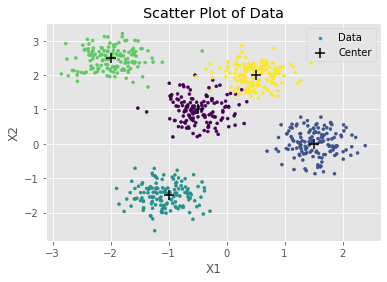

In [3]:
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
def CreateDataset(Cs, nD, S):
    nC = len(Cs)
    N = nD * nC
    X = np.zeros((N, 2))
    Y = np.zeros((N, 1))
    for i in range(0, nD):
        for j in range(0, nC):
            X[nC*i + j, 0] = Cs[j, 0] + np.random.randn() / S
            X[nC*i + j, 1] = Cs[j, 1] + np.random.randn() / S
            Y[nC*i + j, 0] = j
    return X, Y
def Distance(xi, xj):
    dij = xi - xj
    d = np.linalg.norm(dij)
    return d
def CalculateAllDistances(X, xi):
    N = np.shape(X)[0] # Data Size
    D = np.zeros(N) # Placeholder For Distances
    for i in range(0, N):
        xj = X[i]
        D[i] = Distance(xi, xj)
    return D
def KNN(K, X, xi):
    D = CalculateAllDistances(X, xi) # Calculating Distances
    A = np.argsort(D) # Sorted Args by Distance
    Ns = A[:K] # K-Nearest Neighbors
    return Ns
def Classify(K, X, Y, xi):
    Ns = KNN(K, X, xi) # Getting Neighbors Args
    NsLabels = Y[Ns,0] # Getting Neighbors Labels
    C = GetClass(NsLabels)
    return C

Cs = np.array([[-0.5, 1], [1.5, 0], [-1, -1.5], [-2, 2.5], [0.5, 2]])
nD = 140
S = 2.9
X, Y = CreateDataset(Cs, nD, S)
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1],c = Y[:, 0], s = 9, label = 'Data')
plt.scatter(Cs[:,0], Cs[:, 1], c = 'black', s = 100, label = 'Center', marker = '+')
plt.title('Scatter Plot of Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


In [2]:
#Imports
import pandas as pd 
import numpy as np 
import math 
import operator
from google.colab import files 
uploaded = files.upload()
col=['sepal_length','sepal_width','petal_length','petal_width','type']
iris=pd.read_csv("iris.data.csv",names=col)
print(iris)
indices = np.random.permutation(iris.shape[0])
div = int(0.7 * len(indices))
development_id, test_id = indices[:div], indices[div:]
development_set, test_set = iris.loc[development_id,:], iris.loc[test_id,:]
print("Development Set:\n", development_set, "\n\nTest Set:\n", test_set)
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()
test_class = list(test_set.iloc[:,-1])
dev_class = list(development_set.iloc[:,-1])
def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
      # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])
row_list = []
for index, rows in development_set.iterrows():
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list.append([my_list])
# k values for the number of neighbors that need to be considered
k_n = [1, 3, 5, 7]
# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean']
# Performing kNN on the development set by iterating all of the development set data points and for each k and each distance metric
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(development_set, pd.DataFrame(row_list[i]), k, dist_method, mean_development_set, std_development_set))
        development_set_obs_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each k and each distance metric (obs_k of the form obs_k[dist_method][k])
    obs_k[dist_method] = development_set_obs_k
print(obs_k)
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)
# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=['euclidean', 'normalized_euclidean'], kind="bar", colormap='YlGnBu')
draw.set(ylabel='Accuracy')
df_res.loc[df_res['k'] == 1.0, ['euclidean', 'normalized_euclidean']] = np.nan
column_val = [c for c in df_res.columns if not c.startswith('k')]
col_max = df_res[column_val].max().idxmax(1)
best_dist_method = col_max
row_max = df_res[col_max].argmax()
best_k = int(df_res.iloc[row_max]['k'])
if df_res.isnull().values.any():
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m. Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting')
else:
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m.')
row_list_test = []
for index, rows in test_set.iterrows(): 
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list_test.append([my_list])
test_set_obs = []
for i in range(len(row_list_test)):
    test_set_obs.append(knn(test_set, pd.DataFrame(row_list_test[i]), best_k, best_dist_method, mean_test_set, std_test_set))
#print(test_set_obs)

count = 0
for i,j in zip(test_class, test_set_obs):
    if i == j:
        count = count + 1
    else:
        pass
accuracy_test = count/(len(test_class))
print('Final Accuracy of the Test dataset is ', accuracy_test)


ModuleNotFoundError: No module named 'google'